In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data cleaning

In [33]:
data.drop('customerID', axis=1, inplace=True)

In [34]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [35]:
data= data[data.TotalCharges !=' ']
data.shape

(7032, 20)

In [36]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
#coerce used to ignore the errors inside the attribute

In [39]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [40]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


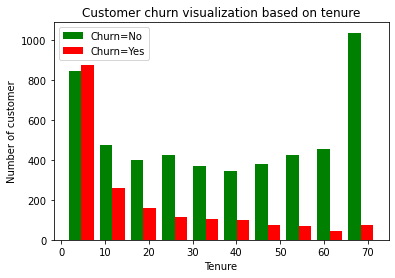

In [41]:
tenure_churn_no=data[data.Churn=='No'].tenure
tenure_churn_yes=data[data.Churn=='Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes], color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.title('Customer churn visualization based on tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.legend()

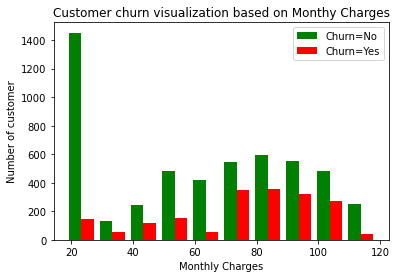

In [42]:
tenure_churn_no=data[data.Churn=='No'].MonthlyCharges
tenure_churn_yes=data[data.Churn=='Yes'].MonthlyCharges

plt.hist([tenure_churn_no,tenure_churn_yes], color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.title('Customer churn visualization based on Monthy Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customer')
plt.legend()

In [43]:
def obj_column_values(data):
    for column in data:
        if data[column].dtypes =='object':
            print(f'{column} : {data[column].unique()}')

In [44]:
obj_column_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [45]:
#Want to replace 'No....' with 'No'
data.replace('No phone service','No', inplace=True)
data.replace('No internet service','No', inplace=True)

In [46]:
# replace 'Yes' and 'No' with 1 & 0 respectively
yes_no_columns =['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes':1, 'No':0},inplace=True)

In [47]:
obj_column_values(data)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [48]:
data['gender'].replace({'Female':0,'Male':1},inplace=True)

In [49]:
data['gender'].unique()

array([0, 1], dtype=int64)

In [50]:
df=pd.get_dummies(data=data,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3931,0,0,1,0,25,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6121,0,0,1,1,8,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
412,0,0,1,0,29,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [52]:
#scaling columns for standard calcuation
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2462,1,0,0,1,0.000000,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
2040,1,0,1,0,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0


In [54]:
X =df.drop(columns='Churn', axis=1)
y =df['Churn']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


In [57]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
852,1,0,0,0,0.014085,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2127,1,0,1,0,0.549296,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
597,1,0,0,0,0.042254,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
206,1,0,1,1,1.000000,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5014,1,1,1,0,0.985915,0,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0


In [58]:
import tensorflow as tf
from tensorflow import keras

In [63]:
model = keras.Sequential([
        tf.keras.layers.Dense(25, input_shape=(26,), activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7596
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7888
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7934
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7988
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7989
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8020
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8032
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8041
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8244
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8249
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8235
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8247
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8263
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8268
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8281
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8235
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8277
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 

In [64]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7903


[0.44786328077316284, 0.7903340458869934]

In [65]:
y_hat=model.predict(X_test)
y_hat[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.7239302 ],
       [0.3860183 ],
       [0.32021892],
       [0.72829473],
       [0.04121858]], dtype=float32)

In [69]:
y_test[:10]

4253    0
2914    0
1569    0
5227    0
4427    0
5879    0
155     0
109     0
5023    1
5257    1
Name: Churn, dtype: int64

In [67]:
y_pred = []
for element in y_hat:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [70]:
y_pred[:10]

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1052
           1       0.59      0.53      0.56       355

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



Text(69.0, 0.5, 'Truth')

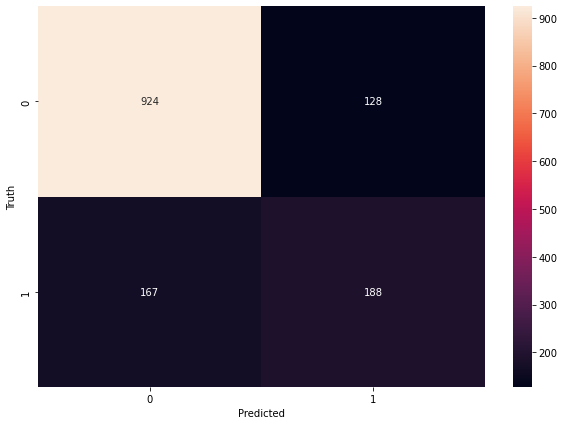

In [75]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
Thank You